In [32]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

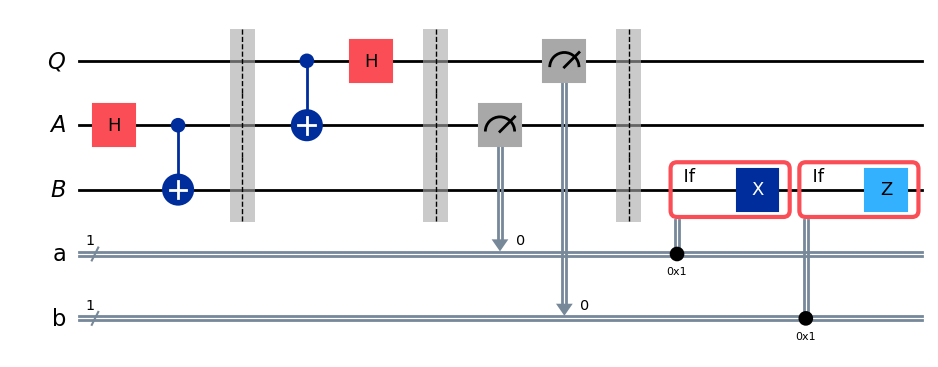

In [74]:
#Defining qubits and bits in the circuit
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1,"B")
a = ClassicalRegister(1, 'a')
b = ClassicalRegister(1, 'b')

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

protocol.h(1)
protocol.cx(1,2)
protocol.barrier()

protocol.cx(0,1)
protocol.h(0)
protocol.barrier()

protocol.measure(1,a)
protocol.measure(0,b)
protocol.barrier()

with protocol.if_test((a,1)):
    protocol.x(2)
with protocol.if_test((b,1)):
    protocol.z(2)
display(protocol.draw(output='mpl'))


In [79]:
random_gate = UGate(random.random()*2*pi,random.random()*2*pi,random.random()*2*pi)

display(random_gate.to_matrix())

array([[ 0.78642417+0.j        , -0.39104687+0.47814158j],
       [-0.2619763 +0.55937951j,  0.34013429+0.70906392j]])

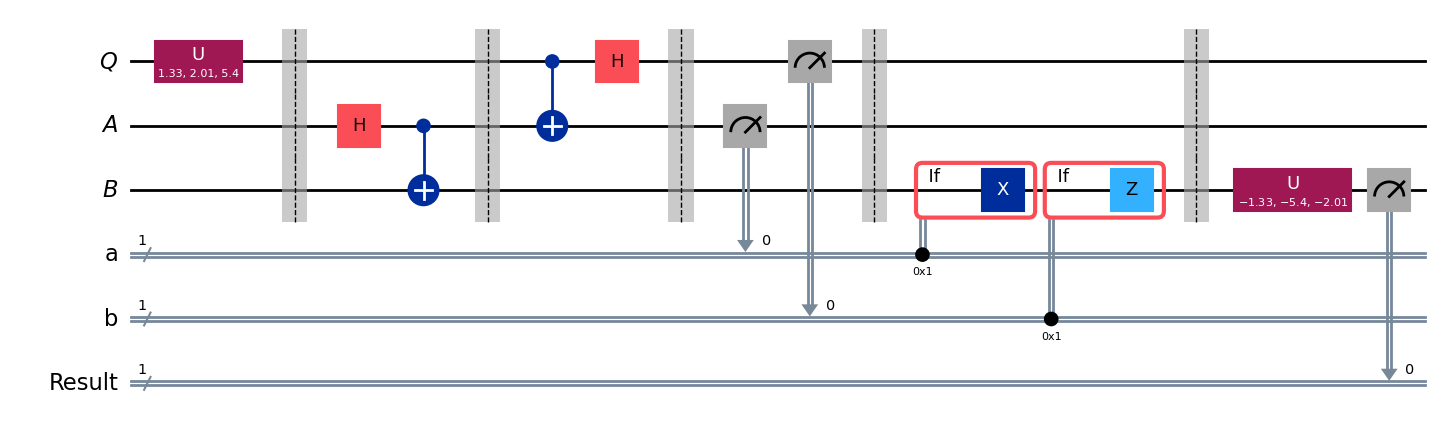

In [80]:
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

test.append(random_gate,qubit)
test.barrier()

test = test.compose(protocol)
test.barrier()

test.append(random_gate.inverse(),ebit1)

result = ClassicalRegister(1,"Result")
test.add_register(result)
test.measure(2, result)

test.draw(output='mpl')

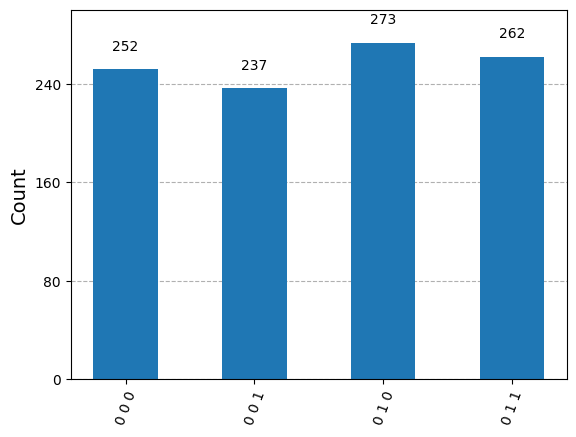

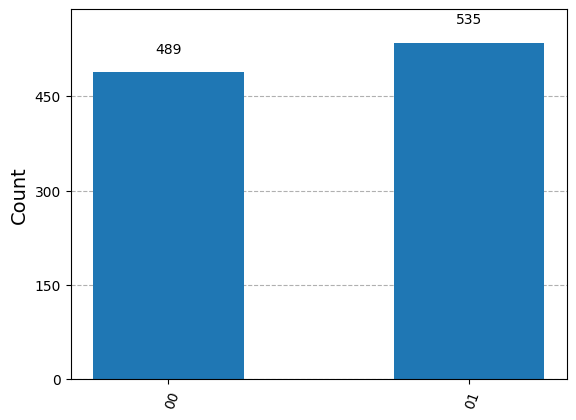

In [107]:
results = AerSimulator().run(test).result()
stats = results.get_counts()
stats
display(plot_histogram(stats))
f_stats = marginal_distribution(stats,[2])
display(plot_histogram(f_stats))